<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Setup---imports" data-toc-modified-id="Setup---imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup - imports</a></span></li><li><span><a href="#Setup---Functions" data-toc-modified-id="Setup---Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Setup - Functions</a></span><ul class="toc-item"><li><span><a href="#function-plot_precision_recall_n" data-toc-modified-id="function-plot_precision_recall_n-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>function plot_precision_recall_n</a></span></li><li><span><a href="#function-threshold_at_k" data-toc-modified-id="function-threshold_at_k-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>function threshold_at_k</a></span></li><li><span><a href="#function-precision_at_k" data-toc-modified-id="function-precision_at_k-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>function precision_at_k</a></span></li><li><span><a href="#function-recall_at_k" data-toc-modified-id="function-recall_at_k-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>function recall_at_k</a></span></li><li><span><a href="#function-accuracy_at_k" data-toc-modified-id="function-accuracy_at_k-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>function accuracy_at_k</a></span></li></ul></li><li><span><a href="#Setup---output" data-toc-modified-id="Setup---output-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Setup - output</a></span></li></ul></li><li><span><a href="#class-CitationCodingEvaluation" data-toc-modified-id="class-CitationCodingEvaluation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>class CitationCodingEvaluation</a></span></li><li><span><a href="#Load-JSON-files" data-toc-modified-id="Load-JSON-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load JSON files</a></span></li><li><span><a href="#Process-JSON" data-toc-modified-id="Process-JSON-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Process JSON</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluate</a></span><ul class="toc-item"><li><span><a href="#precision,-recall,-and-accuracy" data-toc-modified-id="precision,-recall,-and-accuracy-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>precision, recall, and accuracy</a></span></li><li><span><a href="#graph-precision-and-recall-at-n" data-toc-modified-id="graph-precision-and-recall-at-n-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>graph precision and recall at n</a></span></li><li><span><a href="#output-results-to-file" data-toc-modified-id="output-results-to-file-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>output results to file</a></span></li></ul></li></ul></div>

# Setup

- Back to [Table of Contents](#Table-of-Contents)

In [1]:
# DEBUG
debug_flag = False

## Setup - imports

- Back to [Table of Contents](#Table-of-Contents)

In [2]:
# imports
import datetime
import json
import matplotlib
import matplotlib.pyplot
import numpy
import pandas as pd
import six

# scikit-learn
import sklearn
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Setup - Functions

- Back to [Table of Contents](#Table-of-Contents)

### function plot_precision_recall_n

- Back to [Table of Contents](#Table-of-Contents)

In [3]:
def plot_precision_recall_n(y_true, y_prob, model_name, output_path_IN = None ):

    """
    y_true: ls 
        ls of ground truth labels
    y_prob: ls
        ls of predic proba from model
    model_name: str
        str of model name (e.g, LR_123)
    """
    
    # imports
    from sklearn.metrics import precision_recall_curve
    
    # return reference
    details_OUT = {}
    
    # declare variables
    y_score = None
    precision_curve = None
    recall_curve = None
    pr_thresholds = None
    num_above_thresh = None
    pct_above_thresh = None
    pct_above_per_thresh = None
    current_score = None
    above_threshold_list = None
    above_threshold_count = -1
    fig = None
    ax1 = None
    ax2 = None
    
    # store the raw scores in y_score
    y_score = y_prob
    
    # calculate precision-recall curve
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
    # Returns:
    # - precision_curve - Precison values such that element i is the precision of predictions where cutoff is score >= thresholds[ i ] and the last element is 1.
    # - recall_curve - Recall values such that element i is the recall of predictions where cutoff is score >= thresholds[ i ] and the last element is 0.
    # - pr_thresholds - Increasing thresholds on the decision function used to decide 1 or 0, used to calculate precision and recall (looks like it is the set of unique values in the predicted value set).
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve( y_true, y_score )
    
    # get all but the last precision score (1).
    precision_curve = precision_curve[ : -1 ]
    # print( "precision_curve: {}".format( precision_curve ) )
    
    # get all but the last recall score (0).
    recall_curve = recall_curve[ : -1 ]
    # print( "recall_curve: {}".format( recall_curve ) )
    
    # store details
    details_OUT[ "precision" ] = precision_curve
    details_OUT[ "recall" ] = recall_curve
    details_OUT[ "threshold" ] = pr_thresholds
    
    # init loop over thresholds
    pct_above_per_thresh = []
    number_scored = len(y_score)
    
    # loop over thresholds
    for value in pr_thresholds:
        
        # at each threshold, calculate the percent of rows above the threshold.
        above_threshold_list = []
        above_threshold_count = -1
        for current_score in y_score:
            
            # is it at or above threshold?
            if ( current_score >= value ):
                
                # it is either at or above threshold - add to list.
                above_threshold_list.append( current_score )
                
            #-- END check to see if at or above threshold? --#
                
        #-- END loop over scores. --#

        # how many above threshold?
        #num_above_thresh = len(y_score[y_score>=value])
        above_threshold_count = len( above_threshold_list )
        num_above_thresh = above_threshold_count
        
        # percent above threshold
        pct_above_thresh = num_above_thresh / float( number_scored )
        
        # add to list.
        pct_above_per_thresh.append( pct_above_thresh )
        
    #-- END loop over thresholds --#

    details_OUT[ "percent_above" ] = pct_above_per_thresh
    
    # convert to numpy array
    pct_above_per_thresh = numpy.array(pct_above_per_thresh)

    # init matplotlib
    matplotlib.pyplot.clf()
    fig, ax1 = matplotlib.pyplot.subplots()
    
    # plot precision line
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax1.set_ylim(0,1.05)
    
    # plot recall line
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    ax2.set_ylim(0,1.05)
    
    # finish off graph
    name = model_name
    matplotlib.pyplot.title(name)
    
    # is there an output path?
    if ( ( output_path_IN is not None ) and ( output_path_IN != "" ) ):
    
        # save the figure to file.
        matplotlib.pyplot.savefig( output_path_IN )
    
    #-- END check to see if we output to disk. --#
    
    matplotlib.pyplot.show()

    # clear plot.
    matplotlib.pyplot.clf()
    
    return details_OUT
    
#-- END function plot_precision_recall_n() --#

print( "function plot_precision_recall_n() defined at {}".format( datetime.datetime.now() ) )

function plot_precision_recall_n() defined at 2018-12-08 11:21:50.515596


### function threshold_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [4]:
def threshold_at_k( y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    value_list = None
    threshold_index = -1
    
    # sort values
    value_list = numpy.sort( y_scores )
    
    # reverse order of list
    value_list = value_list[ : : -1 ]
    
    # calculate index of value that is k% of the way through the sorted distribution of scores
    threshold_index = int( k * len( y_scores ) )
    
    # get value that is k% of the way through the sorted distribution of scores
    value_OUT = value_list[ threshold_index ]
    
    print( "Threshold: {}".format( value_OUT ) )
    
    return value_OUT

#-- END function threshold_at_k() --#

print( "function threshold_at_k() defined at {}".format( datetime.datetime.now() ) )

function threshold_at_k() defined at 2018-12-08 11:21:50.522118


### function precision_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [5]:
def precision_at_k( y_true, y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    threshold = None
    
    # get threshold index
    threshold = threshold_at_k( y_scores, k )
    
    # use threshold to generate predicted scores
    y_pred = numpy.asarray( [ 1 if i >= threshold else 0 for i in y_scores ] )
    
    # calculate precision
    value_OUT = precision_score( y_true, y_pred )
    
    return value_OUT

#-- END function precision_at_k() --#

print( "function precision_at_k() defined at {}".format( datetime.datetime.now() ) )

function precision_at_k() defined at 2018-12-08 11:21:50.529493


### function recall_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [6]:
def recall_at_k( y_true, y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    threshold = None
    
    # get threshold index
    threshold = threshold_at_k( y_scores, k )
    
    # use threshold to generate predicted scores
    y_pred = numpy.asarray( [ 1 if i >= threshold else 0 for i in y_scores ] )
    
    # calculate recall
    value_OUT = recall_score( y_true, y_pred )
    
    return value_OUT

#-- END function recall_at_k() --#

print( "function recall_at_k() defined at {}".format( datetime.datetime.now() ) )

function recall_at_k() defined at 2018-12-08 11:21:50.536002


### function accuracy_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [7]:
def accuracy_at_k( y_true, y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    threshold = None
    
    # get threshold index
    threshold = threshold_at_k( y_scores, k )
    
    # use threshold to generate predicted scores
    y_pred = numpy.asarray( [ 1 if i >= threshold else 0 for i in y_scores ] )
    
    # calculate accuracy
    value_OUT = accuracy_score( y_true, y_pred )
    
    return value_OUT

#-- END function accuracy_at_k() --#

print( "function accuracy_at_k() defined at {}".format( datetime.datetime.now() ) )

function accuracy_at_k() defined at 2018-12-08 11:21:50.542776


## Setup - output

- Back to [Table of Contents](#Table-of-Contents)

In [8]:
# DEBUG
debug_flag = False

# output_to_file flag
output_to_file = True
line_list = None
output_string = None
#output_folder_path = "/data/output"
output_folder_path = "../data/output"
results_file_path = "{}/evaluation_results.txt".format( output_folder_path )
precision_recall_graph_path = "{}/precision_recall_graph.pdf".format( output_folder_path )

# if we are outputting to file, start line list.
if ( output_to_file == True ):
    
    # put a list in line_list
    line_list = []
    
#-- END init line list --#

# class CitationCodingEvaluation

- Back to [Table of Contents](#Table-of-Contents)

In [9]:
from citation_coding_evaluation import CitationCodingEvaluation

# Load JSON files

- Back to [Table of Contents](#Table-of-Contents)

In [10]:
# file paths
baseline_json_path = "./data_set_citations.json"
derived_prefix = ""
# set to ".." for running against in-repo code development
derived_prefix = ".."
derived_json_path = "{}/data/output/data_set_citations.json".format( derived_prefix )

In [11]:
# load the baseline JSON
baseline_json_file = None
baseline_json = None

# if output...
output_string = "Reading baseline/ground_truth file: {}".format( baseline_json_path )
print( output_string )

if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )

#-- END if output to file... --#

# baseline
with open( baseline_json_path ) as baseline_json_file:

    # load the JSON from the file.
    baseline_json = json.load( baseline_json_file )

#-- END with...as --#

Reading baseline/ground_truth file: ./data_set_citations.json


In [12]:
# load the derived JSON
derived_json_file = None
derived_json = None

# if output...
output_string = "Reading derived/predicted file: {}".format( derived_json_path )
print( output_string )

if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )
    
#-- END if output to file... --#

# baseline
with open( derived_json_path ) as derived_json_file:

    # load the JSON from the file.
    derived_json = json.load( derived_json_file )

#-- END with...as --#

Reading derived/predicted file: ../data/output/data_set_citations.json


In [13]:
baseline_json

[{'citation_id': 2019,
  'publication_id': 143,
  'data_set_id': 352,
  'mention_list': ['MiDi', 'Micro Database Direct Investment'],
  'score': 1.0},
 {'citation_id': 2020,
  'publication_id': 143,
  'data_set_id': 311,
  'mention_list': ['German International Trade in Services Statistics',
   'ITS',
   'International Trade in Services Statistics',
   'micro-level German International Trade in Services'],
  'score': 1.0},
 {'citation_id': 2030,
  'publication_id': 153,
  'data_set_id': 361,
  'mention_list': ['MiDi', 'Microdatabase Direct Investment'],
  'score': 1.0},
 {'citation_id': 2042,
  'publication_id': 163,
  'data_set_id': 373,
  'mention_list': ['International Capital Links', 'Midi'],
  'score': 1.0},
 {'citation_id': 2098,
  'publication_id': 189,
  'data_set_id': 397,
  'mention_list': ['1997 National Health Interview Survey (NHIS)',
   'NHIS',
   'sponsored by the Na- tional Center for Health Statistics (NCHS)'],
  'score': 1.0},
 {'citation_id': 2102,
  'publication_id'

In [14]:
derived_json

[{'publication_id': 143,
  'data_set_id': 311,
  'mention_list': ['micro level German International Trade in Services',
   'ITS',
   'MiDi ITS'],
  'score': 1.0},
 {'publication_id': 143,
  'data_set_id': 339,
  'mention_list': ['ITS MiDi', 'MiDi'],
  'score': 1.0},
 {'publication_id': 143,
  'data_set_id': 5833,
  'mention_list': ['Balance of Payments Statistics'],
  'score': 1.0},
 {'publication_id': 143,
  'data_set_id': 481,
  'mention_list': ['Survey'],
  'score': 1.0},
 {'publication_id': 153,
  'data_set_id': 339,
  'mention_list': ['Microdatabase Direct Investment', 'MiDi'],
  'score': 1.0},
 {'publication_id': 163,
  'data_set_id': 339,
  'mention_list': ['International Capital Links', 'Midi'],
  'score': 1.0},
 {'publication_id': 163,
  'data_set_id': 1,
  'mention_list': ['time series'],
  'score': 1.0},
 {'publication_id': 189,
  'data_set_id': 750,
  'mention_list': ['National Health Interview Survey ( NHIS )'],
  'score': 1.0},
 {'publication_id': 189,
  'data_set_id': 14

# Process JSON

- Back to [Table of Contents](#Table-of-Contents)

In [15]:
# init class to handle evaluation
coding_evaluator = CitationCodingEvaluation()
coding_evaluator.debug_flag = debug_flag

In [16]:
# process baseline JSON
result_type = CitationCodingEvaluation.RESULT_TYPE_BASELINE
citation_json = baseline_json
status = coding_evaluator.process_citation_json( citation_json, result_type )

# output
output_string = "Processing status for {} (None = Success!): \"{}\"".format( result_type, status )
print( output_string )

# if output...
if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )
    
#-- END if output... --#


Processing status for baseline (None = Success!): "None"


In [17]:
# process derived JSON
result_type = CitationCodingEvaluation.RESULT_TYPE_DERIVED
citation_json = derived_json
status = coding_evaluator.process_citation_json( citation_json, result_type )

# output
output_string = "Processing status for {} (None = Success!): \"{}\"".format( result_type, status )
print( output_string )

# if output...
if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )
    
#-- END if output... --#


Processing status for derived (None = Success!): "None"


# Evaluate

- Back to [Table of Contents](#Table-of-Contents)

In [18]:
# create lists
status = coding_evaluator.create_evaluation_lists()
baseline_list = coding_evaluator.get_baseline_list()
derived_raw_list = coding_evaluator.get_derived_raw_list()
derived_binary_list = coding_evaluator.get_derived_binary_list()

## precision, recall, and accuracy

- Back to [Table of Contents](#Table-of-Contents)

In [19]:
# calculation methods
CALCULATION_METHOD_DEFAULT = "default"
CALCULATION_METHOD_BINARY = "binary"
CACLULATION_METHOD_MACRO = "macro"
CALCULATION_METHOD_MICRO = "micro"
CALCULATION_METHOD_WEIGHTED = "weighted"

# calculation methods to include
calculation_methods = []
calculation_methods.append( CALCULATION_METHOD_DEFAULT )
calculation_methods.append( CALCULATION_METHOD_BINARY )
#calculation_methods.append( CACLULATION_METHOD_MACRO )
#calculation_methods.append( CALCULATION_METHOD_MICRO )
#calculation_methods.append( CALCULATION_METHOD_WEIGHTED )

# confusion matrix
cm = metrics.confusion_matrix( baseline_list, derived_binary_list )

# output
output_string = "\nConfusion matrix:\n{}\n\nBinary Key:\n[[ TN, FP ]\n [ FN, TP ]]".format( cm )
print( output_string )

# if output to file...
if ( output_to_file == True ):

    # store line for output
    line_list.append( output_string )

#-- END if output... --#

# loop over calculation methods
method_to_result_map = {}
for calculation_method in calculation_methods:

    # output
    output_string = "\n==> {}".format( calculation_method )
    print( output_string )

    # if output to file...
    if ( output_to_file == True ):

        # store line for output
        line_list.append( output_string )

    #-- END if output... --#

    # binary?  If so, do basic calculations as sanity check.
    if ( calculation_method == CALCULATION_METHOD_BINARY ):

        # calculate precision, recall, accuracy...

        # ==> precision
        precision = metrics.precision_score( baseline_list, derived_binary_list )

        # output
        output_string = "\n- {} metrics.precision_score = {}".format( calculation_method, precision )
        print( output_string )

        # if output...
        if ( output_to_file == True ):

            # store line for output
            line_list.append( output_string )

        #-- END if output... --#

        # ==> recall
        recall = metrics.recall_score( baseline_list, derived_binary_list )

        # output
        output_string = "- {} metrics.recall_score = {}".format( calculation_method, recall )
        print( output_string )

        # if output...
        if ( output_to_file == True ):

            # store line for output
            line_list.append( output_string )

        #-- END if output... --#

        # ==> accuracy
        accuracy = metrics.accuracy_score( baseline_list, derived_binary_list )

        # output
        output_string = "- {} metrics.accuracy_score = {}".format( calculation_method, accuracy )
        print( output_string )

        # if output...
        if ( output_to_file == True ):

            # store line for output
            line_list.append( output_string )

        #-- END if output... --#
        
    #-- END check to see if CALCULATION_METHOD_BINARY --#

    # calculate based on calculation method.

    # default?
    if ( calculation_method == CALCULATION_METHOD_DEFAULT ):

        # default metrics and F-Score - default returns a list for each of
        #     the scores per label, so get list and output, don't pick one or
        #     another value.
        default_evaluation = metrics.precision_recall_fscore_support( baseline_list, derived_binary_list )
        default_precision_list = default_evaluation[ 0 ]
        default_recall_list = default_evaluation[ 1 ]
        default_F1_list = default_evaluation[ 2 ]
        default_support_list = default_evaluation[ 3 ]

        # output lists
        output_string = "\ndefault lists:"
        output_string += "\n- precision list = {}".format( default_precision_list )
        output_string += "\n- recall list = {}".format( default_recall_list )
        output_string += "\n- F1 list = {}".format( default_F1_list )
        output_string += "\n- support list = {}".format( default_support_list )

        # add to results map
        method_to_result_map[ calculation_method ] = default_evaluation

        # look at length of lists (should all be the same).
        precision_list_length = len( default_precision_list )
        recall_list_length = len( default_recall_list )
        F1_list_length = len( default_F1_list )
        
        output_string += "\n\nlist lengths: {}".format( precision_list_length )

        if ( precision_list_length > 2 ):

            # binary, but list is greater than 2, not binary - output message.
            output_string += "\n- NOTE: default output lists have more than two entries - your data is not binary."

        #-- END check to see if list length greater than 2 --#
        
        print( output_string )

        # if output...
        if ( output_to_file == True ):

            # store line for output
            line_list.append( output_string )

        #-- END if output... --#

    # all others are just argument to "average" parameter, result in one number per
    #     derived score.  For now, implement them the same.
    else:

        # F-Score
        evaluation_tuple = metrics.precision_recall_fscore_support( baseline_list, derived_binary_list, average = calculation_method )
        precision = evaluation_tuple[ 0 ]
        recall = evaluation_tuple[ 1 ]
        F1 = evaluation_tuple[ 2 ]
        support = evaluation_tuple[ 3 ]
        
        # add to results map
        method_to_result_map[ calculation_method ] = evaluation_tuple

        # output
        output_string = "\n{}: precision = {}, recall = {}, F1 = {}, support = {}".format( calculation_method, precision, recall, F1, support )
        print( output_string )

        # if output to file...
        if ( output_to_file == True ):

            # store line for output
            line_list.append( output_string )

        #-- END if output... --#

    #-- END default F-Score --#

#-- END loop over calculation_methods --#



Confusion matrix:
[[  0 113]
 [ 75  25]]

Binary Key:
[[ TN, FP ]
 [ FN, TP ]]

==> default

default lists:
- precision list = [0.         0.18115942]
- recall list = [0.   0.25]
- F1 list = [0.         0.21008403]
- support list = [113 100]

list lengths: 2

==> binary

- binary metrics.precision_score = 0.18115942028985507
- binary metrics.recall_score = 0.25
- binary metrics.accuracy_score = 0.11737089201877934

binary: precision = 0.18115942028985507, recall = 0.25, F1 = 0.21008403361344535, support = None


## graph precision and recall at n

- Back to [Table of Contents](#Table-of-Contents)

<Figure size 432x288 with 0 Axes>

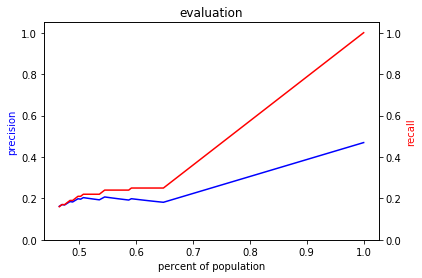

<Figure size 432x288 with 0 Axes>

In [20]:
# output to file?
if ( output_to_file == True ):
    
    # output figure to file
    plot_precision_recall_n( baseline_list, derived_raw_list, "evaluation", output_path_IN = precision_recall_graph_path )

else:
    
    # just output to standard out (as is possible)
    plot_precision_recall_n( baseline_list, derived_raw_list, "evaluation" )

#-- END check to see if output graph to file --#

## output results to file

- Back to [Table of Contents](#Table-of-Contents)

In [21]:
# declare variables
results_file = None
line_list_string = None

# do we output to file?
if ( output_to_file == True ):
    
    # yes.  open output file.
    with open( results_file_path, mode = "w" ) as results_file:

        # join line list with "/n", then write.
        line_list_string = "\n".join( line_list )
        results_file.write( line_list_string )

    #-- END with...as --#    
    
#-- END check to see if we output to file --#